In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Audio
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt

In [ ]:
def resample(signal):
    X = np.fft.fft(signal, fs)
    X = np.fft.fftshift(X)  #fft.fft gives a dtft 0-2pi,zero-center it

    #upsampling first
    #upsample by 
    y = upsample(3,x)
    Y = np.fft.fft(y)
    Y = np.fft.fftshift(Y)

    '''
    w = np.linspace(-np.pi,np.pi,len(X))
    w1 = np.linspace(-np.pi,np.pi,len(Y))
    plt.figure(figsize=(13,5))
    plt.subplot(1,2,1)
    plt.plot(w,X)
    plt.subplot(1,2,2)
    plt.plot(w1,Y)
    '''

    #post-interpolation filtering
    #create filter
    lpf = lowpass(3)
    LPF = np.fft.fft(lpf,1000)
    LPF = np.fft.fftshift(LPF)

    #convolution
    y = np.convolve(lpf,y)
    Y = np.fft.fft(y)
    Y = np.fft.fftshift(Y)

    '''
    w = np.linspace(-np.pi,np.pi,len(Y))
    plt.figure()
    plt.plot(w,Y)
    '''

    #downsample by 5
    y = downsample(3,y)
    Y = np.fft.fft(y)
    Y = np.fft.fftshift(Y)

    w1 = np.linspace(-np.pi,np.pi,len(Y))
    plt.figure()
    plt.title('up first')
    plt.plot(w1,abs(Y))


workspace: /mnt/c/Users/24488/Desktop/Study/ECE397Project/ece397_project
loading in: sound1.wav
44100
loading in: sound2.wav
44100
loading in: sound3.wav
44100
loading completed
start FFT
FFT completed


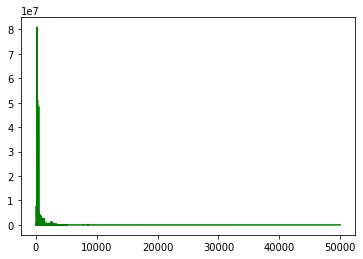

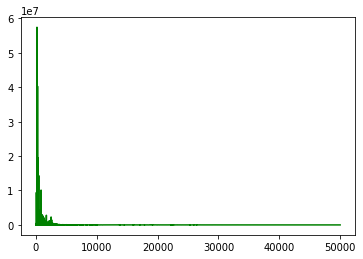

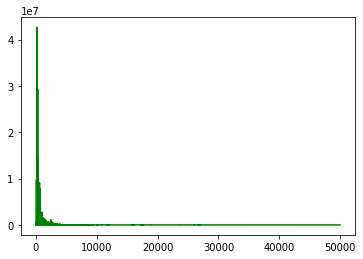

In [3]:
#get the current workspace's abs path
path = os.getcwd()
print("workspace: " + path)
#get the file names of instrument sounds
snds_path = os.listdir(path + '/instru_snds')

snds = []
all_fs = []
for file in snds_path:
    print("loading in: " + file)
    print(fs)
    audio = np.array([])
    fs,audio = wavfile.read('instru_snds/' + file) #load the data
    snds.append(audio)
    all_fs.append(fs)

print("loading completed")
snds = np.asarray(snds)
all_fs = np.asarray(all_fs)


#FFT
print("start FFT")
FFTs = []

for audio in snds:
    AUD = np.fft.rfft(audio, 100000)
    AUD = np.absolute(AUD)
    FFTs.append(AUD)

for AUD in FFTs:
    plt.figure()
    plt.plot(AUD,"g")
    
print("FFT completed")
FFTs = np.asarray(FFTs)

